# Análisis Biden - Trump con Transformer

Creado por: Luis Norberto Zúñiga Morales, José Emilio Quiroz Ibara

Instituto de Investigación Aplicada y Tecnología (INIAT), Universidad Iberoamericana Ciudad de México.

Otoño 2023

## Instalación de librerías

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [ ]:
!pip install tensorflow

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from transformers import pipeline

# for text processing
import re
import nltk
from nltk.tokenize import word_tokenize
import string
import emoji
import contractions

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

## Análisis Trump

### Carga de datos Trump

In [ ]:
df_trump = pd.read_csv('TrumpTweets.csv')

In [ ]:
df_trump.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f


In [ ]:
df_trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         56571 non-null  int64 
 1   text       56571 non-null  object
 2   isRetweet  56571 non-null  object
 3   isDeleted  56571 non-null  object
 4   device     56571 non-null  object
 5   favorites  56571 non-null  int64 
 6   retweets   56571 non-null  int64 
 7   date       56571 non-null  object
 8   isFlagged  56571 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.9+ MB


### Filtramos solo los que estén relacionados con México

In [ ]:
df_tr_filtered = df_trump[df_trump['text'].str.contains('Mexico|mexico|mexicans|mexican')]

In [ ]:
df_tr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 255 to 56540
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         342 non-null    int64 
 1   text       342 non-null    object
 2   isRetweet  342 non-null    object
 3   isDeleted  342 non-null    object
 4   device     342 non-null    object
 5   favorites  342 non-null    int64 
 6   retweets   342 non-null    int64 
 7   date       342 non-null    object
 8   isFlagged  342 non-null    object
dtypes: int64(3), object(6)
memory usage: 26.7+ KB


In [ ]:
df_tr_filtered.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
255,1346822958006886400,Even Mexico uses Voter I.D.,f,f,Twitter for iPhone,458141,72314,2021-01-06 14:16:30,f
1558,1304166722912636936,Yvette Herrell (@Yvette4Congress) is a proven ...,f,f,Twitter for iPhone,20973,5721,2020-09-10 21:15:51,f
1703,1322252819299135488,...a cheerleader for NAFTA – sending your auto...,f,f,Twitter for iPhone,44842,9563,2020-10-30 19:03:33,f
1947,1322868385361891328,When I originally became your all time favorit...,f,f,Twitter for iPhone,124689,22972,2020-11-01 11:49:35,f
2072,1323155810910982145,...As I said at the debate – “Will you remembe...,f,f,Twitter for iPhone,92746,16287,2020-11-02 06:51:43,f


### Clasificación de polaridad

In [ ]:
clf = pipeline('text-classification', model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
clf('	We\'re excited to announce that @JoeBiden is being rebooted for the 2012 campaign season to give you news of the Vice President on the trail.')

[{'label': 'positive', 'score': 0.952182948589325}]

In [ ]:
def inferencia_tuit(text):
  return clf(text)[0]['label']

In [ ]:
df_tr_filtered['label'] = df_tr_filtered['text'].apply(lambda x: inferencia_tuit(x))

<ipython-input-17-8b23c385ca54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr_filtered['label'] = df_tr_filtered['text'].apply(lambda x: inferencia_tuit(x))


In [ ]:
df_tr_filtered.to_csv('trump-filtered-labeled.csv')

In [ ]:
df_tr_filtered.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,label
255,1346822958006886400,Even Mexico uses Voter I.D.,f,f,Twitter for iPhone,458141,72314,2021-01-06 14:16:30,f,neutral
1558,1304166722912636936,Yvette Herrell (@Yvette4Congress) is a proven ...,f,f,Twitter for iPhone,20973,5721,2020-09-10 21:15:51,f,positive
1703,1322252819299135488,...a cheerleader for NAFTA – sending your auto...,f,f,Twitter for iPhone,44842,9563,2020-10-30 19:03:33,f,negative
1947,1322868385361891328,When I originally became your all time favorit...,f,f,Twitter for iPhone,124689,22972,2020-11-01 11:49:35,f,negative
2072,1323155810910982145,...As I said at the debate – “Will you remembe...,f,f,Twitter for iPhone,92746,16287,2020-11-02 06:51:43,f,positive


## Análisis Biden

### Carga de datos

In [ ]:
df_biden = pd.read_csv('JoeBidenTweets.csv')

In [ ]:
df_biden.head()

,id,timestamp,url,tweet,replies,retweets,quotes,likes
0,361388562,2007-10-24 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast o...,19,5,17,11
1,543984392,2007-12-29 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden ...",13,16,6,22
2,189287227321356289,2012-04-09 09:42,https://twitter.com/JoeBiden/status/1892872273...,We're excited to announce that @JoeBiden is be...,21,82,1,20
3,189287350034104320,2012-04-09 09:43,https://twitter.com/JoeBiden/status/1892873500...,Campaign staff will run this account to keep y...,144,76,37,51
4,189339650610036736,2012-04-09 13:11,https://twitter.com/JoeBiden/status/1893396506...,News for you this morning: VP Biden will speak...,10,54,0,5


In [ ]:
df_biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         6064 non-null   int64 
 1   timestamp  6064 non-null   object
 2   url        6064 non-null   object
 3   tweet      6064 non-null   object
 4   replies    6064 non-null   int64 
 5   retweets   6064 non-null   int64 
 6   quotes     6064 non-null   int64 
 7   likes      6064 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 379.1+ KB


### Filtramos solo los que estén relacionados con México

In [ ]:
df_bd_filtered = df_biden[df_biden['tweet'].str.contains('Mexico|mexico|mexicans')]

In [ ]:
df_bd_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 67 to 5814
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10 non-null     int64 
 1   timestamp  10 non-null     object
 2   url        10 non-null     object
 3   tweet      10 non-null     object
 4   replies    10 non-null     int64 
 5   retweets   10 non-null     int64 
 6   quotes     10 non-null     int64 
 7   likes      10 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes


In [ ]:
df_bd_filtered.head()

,id,timestamp,url,tweet,replies,retweets,quotes,likes
67,195966131255787521,2012-04-27 20:02,https://twitter.com/JoeBiden/status/1959661312...,"In March, the VP traveled to Mexico and Hondur...",1,9,0,3
310,235124711015739392,2012-08-13 21:24,https://twitter.com/JoeBiden/status/2351247110...,VP Biden visited the Basilica of Our Lady of G...,19,30,0,5
1540,1138536524381851648,2019-06-11 20:00,https://twitter.com/JoeBiden/status/1138536524...,President Trump is bringing his secret one pag...,1126,2282,177,10526
1542,1138614392508100608,2019-06-12 01:10,https://twitter.com/JoeBiden/status/1138614392...,President Trump thinks his tariffs are being p...,2597,6114,473,33409
2166,1169298578558394371,2019-09-04 17:18,https://twitter.com/JoeBiden/status/1169298578...,President Trump promised Mexico would pay for ...,593,2026,144,5688


### Clasificación de polaridad

In [ ]:
clf = pipeline('text-classification', model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def inferencia_tuit(text):
  return clf(text)[0]['label']

In [ ]:
df_bd_filtered['label'] = df_bd_filtered['tweet'].apply(lambda x: inferencia_tuit(x))

<ipython-input-28-da2555b074af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bd_filtered['label'] = df_bd_filtered['tweet'].apply(lambda x: inferencia_tuit(x))


In [ ]:
df_tr_filtered.to_csv('biden-filtered-labeled.csv')

In [ ]:
df_tr_filtered.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,label
255,1346822958006886400,Even Mexico uses Voter I.D.,f,f,Twitter for iPhone,458141,72314,2021-01-06 14:16:30,f,neutral
1558,1304166722912636936,Yvette Herrell (@Yvette4Congress) is a proven ...,f,f,Twitter for iPhone,20973,5721,2020-09-10 21:15:51,f,positive
1703,1322252819299135488,...a cheerleader for NAFTA – sending your auto...,f,f,Twitter for iPhone,44842,9563,2020-10-30 19:03:33,f,negative
1947,1322868385361891328,When I originally became your all time favorit...,f,f,Twitter for iPhone,124689,22972,2020-11-01 11:49:35,f,negative
2072,1323155810910982145,...As I said at the debate – “Will you remembe...,f,f,Twitter for iPhone,92746,16287,2020-11-02 06:51:43,f,positive


## Nubes de palabras

In [ ]:
def get_wordnet_pos(treebank_tag):

	if treebank_tag.startswith('J'):
		return nltk.corpus.wordnet.ADJ
	elif treebank_tag.startswith('V'):
		return nltk.corpus.wordnet.VERB
	elif treebank_tag.startswith('N'):
		return nltk.corpus.wordnet.NOUN
	elif treebank_tag.startswith('R'):
		return nltk.corpus.wordnet.ADV
	else:
		return nltk.corpus.wordnet.NOUN

In [ ]:
def my_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None, flg_contractions = False):

  # quitamos hashtags
  clean_tweet = re.sub('#[A-Za-z0-9_]+', '', text.lower())

  # quitamos cashtags
  clean_tweet = re.sub('\$[A-Za-z0-9_]+', '', clean_tweet)

  # quitamos nombres de usuario
  clean_tweet = re.sub('@[A-Za-z0-9_]+', '', clean_tweet)

  # sustituimos emojis por su traduccion al idioma objetivo
  clean_tweet = emoji.demojize(clean_tweet, language = 'en')

  # quitamos enlaces
  clean_tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', clean_tweet)

  # quitamos signos de puntuacion
  clean_tweet = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', clean_tweet)

  # quitamos numeros
  clean_tweet = re.sub('[0-9_]+', '', clean_tweet)

  # quitar caracteres repetidos
  clean_tweet = re.sub(r'(.)\1{2,}', r'\1', clean_tweet)

  # quitamos contracciones (solo para el ingles)
  if (flg_contractions == True):
    clean_tweet = contractions.fix(clean_tweet)

  # tokenizamos
  clean_tweet = word_tokenize(clean_tweet) # crear una lista con los tokens de cada texto

  # filtramos palabras vacias
  if (lst_stopwords is not None):
    clean_tweet = [word for word in clean_tweet if word not in lst_stopwords]

  # Stemming
  if (flg_stemm == True):
    ps = nltk.stem.porter.PorterStemmer()
    clean_tweet = [ps.stem(word) for word in clean_tweet]

  # Lematizacion
  if (flg_lemm == True):
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    tags = nltk.pos_tag(clean_tweet)
    clean_tweet = [wnl.lemmatize(j[0],get_wordnet_pos(j[1])) for j in tags]

  # volvemos a juntar las palabras en una oracion
  text = " ".join(clean_tweet)
  return text

In [ ]:
s = nltk.corpus.stopwords.words("english")
s.append('new')
s.append('amp')
print(s)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Aplicamos nuestra función para procesar el texto en el corpus dentro del DataFrame
df_tr_filtered["text_clean"] = df_tr_filtered["text"].apply(lambda x: my_preprocess_text(x, flg_stemm=False,
                                                                 flg_lemm=True,
                                                                 lst_stopwords=s,
                                                                 flg_contractions = True)) #append() las nuevas palabras que quieran quitar

<ipython-input-32-2a23009bd27f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr_filtered["text_clean"] = df_tr_filtered["text"].apply(lambda x: my_preprocess_text(x, flg_stemm=False,


In [ ]:
# Aplicamos nuestra función para procesar el texto en el corpus dentro del DataFrame
df_bd_filtered["text_clean"] = df_bd_filtered["tweet"].apply(lambda x: my_preprocess_text(x, flg_stemm=False,
                                                                 flg_lemm=True,
                                                                 lst_stopwords=s,
                                                                 flg_contractions = True)) #append() las nuevas palabras que quieran quitar

<ipython-input-33-2da2959af025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bd_filtered["text_clean"] = df_bd_filtered["tweet"].apply(lambda x: my_preprocess_text(x, flg_stemm=False,


In [ ]:
df_bd_filtered.head()

,id,timestamp,url,tweet,replies,retweets,quotes,likes,label,text_clean
67,195966131255787521,2012-04-27 20:02,https://twitter.com/JoeBiden/status/1959661312...,"In March, the VP traveled to Mexico and Hondur...",1,9,0,3,neutral,march vp travel mexico honduras talk economic ...
310,235124711015739392,2012-08-13 21:24,https://twitter.com/JoeBiden/status/2351247110...,VP Biden visited the Basilica of Our Lady of G...,19,30,0,5,positive,vp biden visit basilica lady guadalupe holy ro...
1540,1138536524381851648,2019-06-11 20:00,https://twitter.com/JoeBiden/status/1138536524...,President Trump is bringing his secret one pag...,1126,2282,177,10526,neutral,president trump bring secret one page agreemen...
1542,1138614392508100608,2019-06-12 01:10,https://twitter.com/JoeBiden/status/1138614392...,President Trump thinks his tariffs are being p...,2597,6114,473,33409,negative,president trump think tariff pay china like th...
2166,1169298578558394371,2019-09-04 17:18,https://twitter.com/JoeBiden/status/1169298578...,President Trump promised Mexico would pay for ...,593,2026,144,5688,negative,president trump promise mexico would pay borde...


[Text(0, 0, '6'), Text(0, 0, '3'), Text(0, 0, '1')]

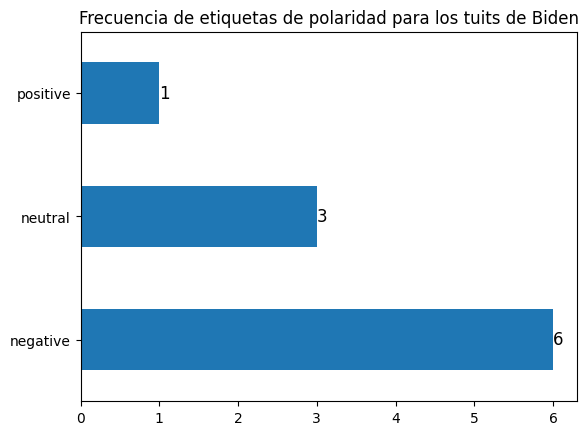

In [ ]:
ax = df_bd_filtered['label'].value_counts().plot.barh()
plt.title('Frecuencia de etiquetas de polaridad para los tuits de Biden')
ax.bar_label(ax.containers[0], fontsize=12)
#plt.show()

[Text(0, 0, '169'), Text(0, 0, '103'), Text(0, 0, '70')]

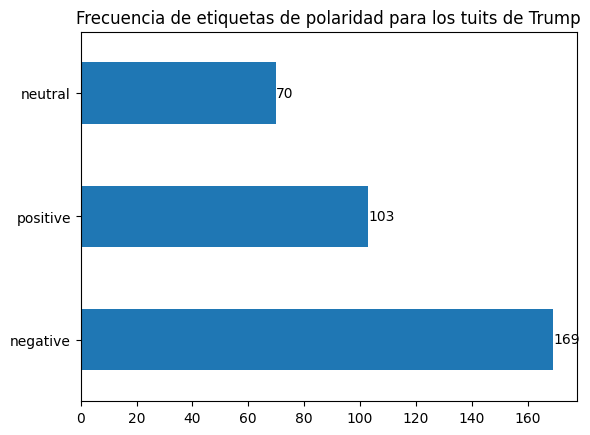

In [ ]:
ax = df_tr_filtered['label'].value_counts().plot.barh()
plt.title('Frecuencia de etiquetas de polaridad para los tuits de Trump')
ax.bar_label(ax.containers[0], fontsize=10)
#plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
def make_word_cloud(tweets):

	wordcloud = WordCloud(width = 800, height = 800,
	                      background_color ='black',
												           min_font_size = 10)
	wordcloud.generate(' '.join(tweets))
	# wordcloud.generate(tweets)
	# plot the WordCloud image
	plt.figure(figsize = (8, 8), facecolor = None)
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.tight_layout(pad = 0)

	plt.show()

### Nubes de palabras - Trump

In [ ]:
df_tr_pos = df_tr_filtered[df_tr_filtered['label']== 'positive']
df_tr_neg = df_tr_filtered[df_tr_filtered['label']== 'negative']
df_tr_neu = df_tr_filtered[df_tr_filtered['label']== 'neutral']

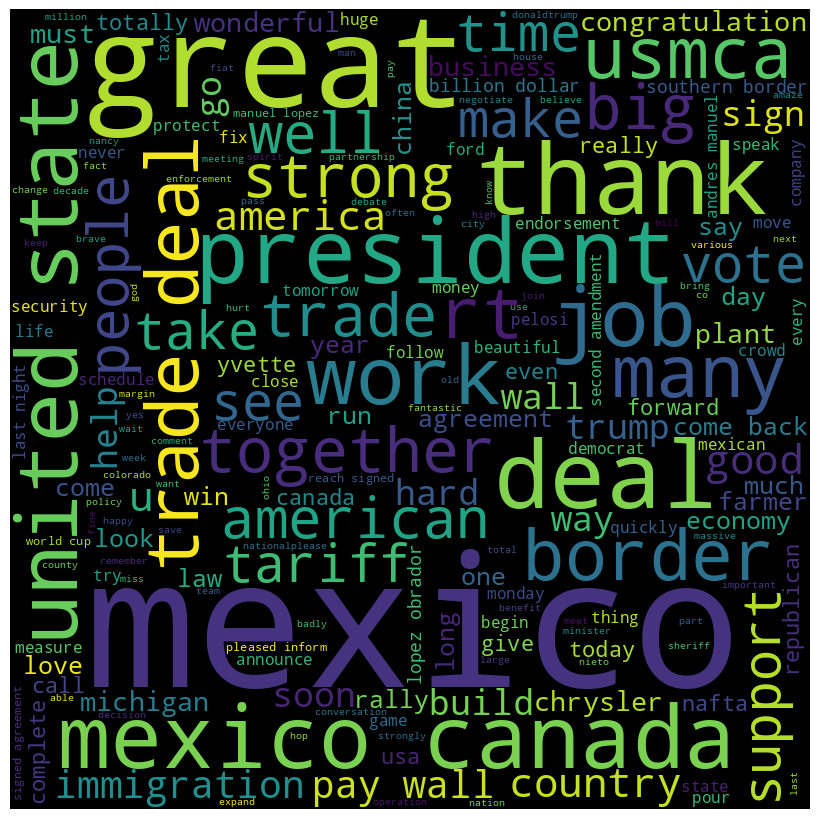

In [ ]:
make_word_cloud(df_tr_pos['text_clean'])

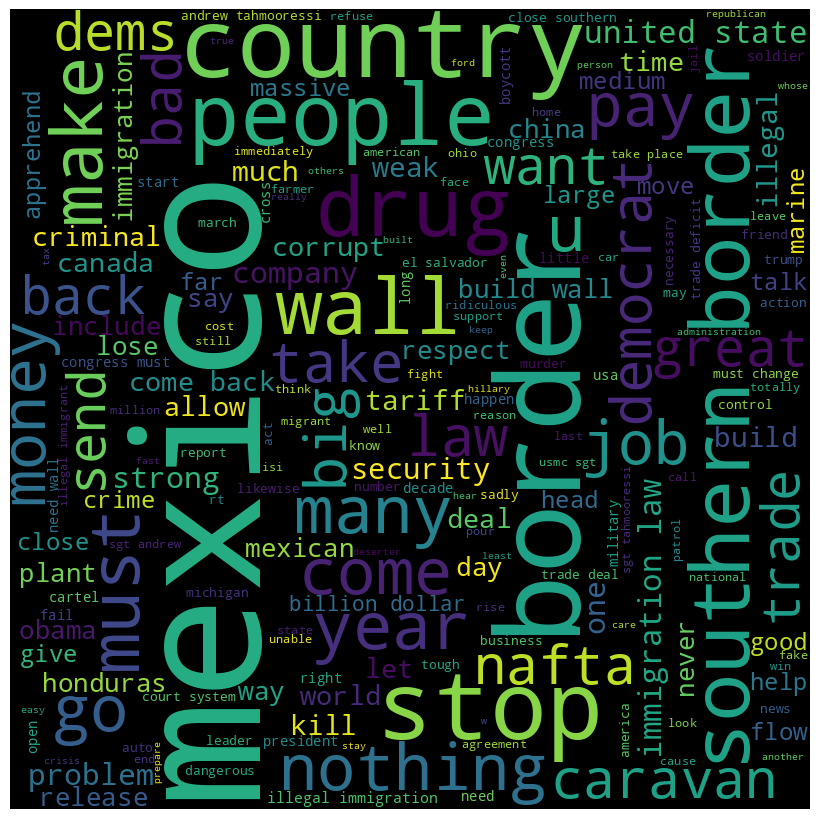

In [ ]:
make_word_cloud(df_tr_neg['text_clean'])

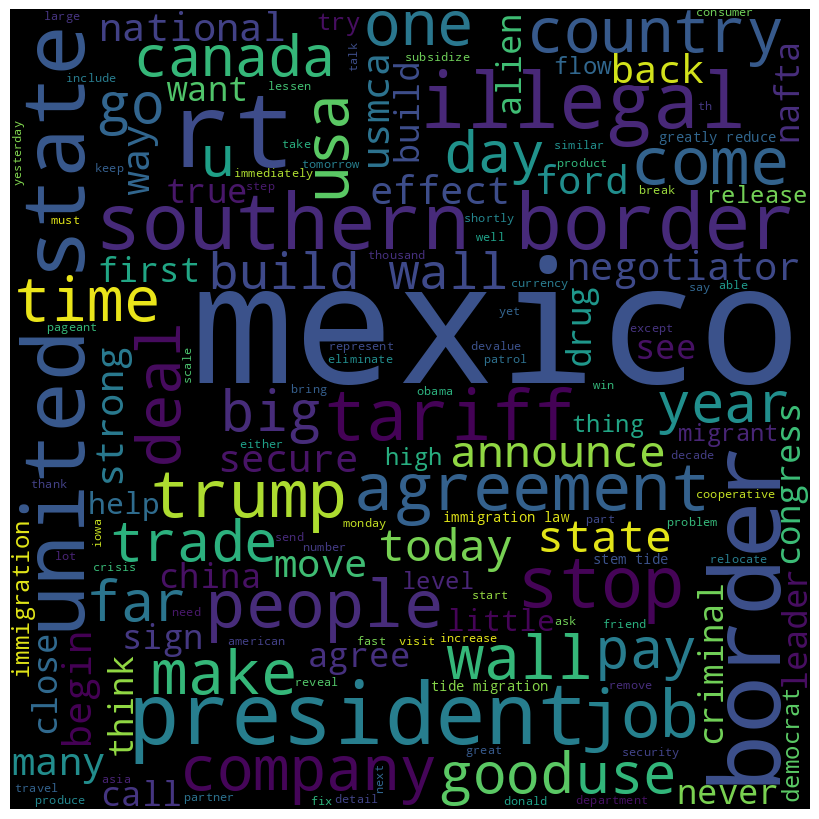

In [ ]:
make_word_cloud(df_tr_neu['text_clean'])

### Nubes de palabra - Biden

In [ ]:
df_bd_pos = df_bd_filtered[df_bd_filtered['label']== 'positive']
df_bd_neg = df_bd_filtered[df_bd_filtered['label']== 'negative']
df_bd_neu = df_bd_filtered[df_bd_filtered['label']== 'neutral']

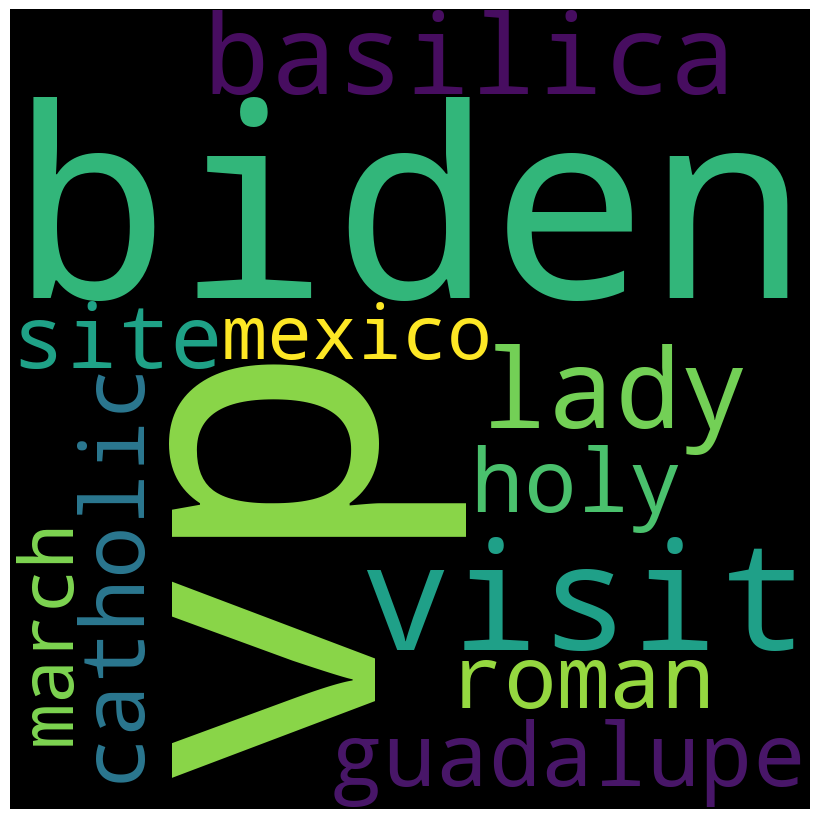

In [ ]:
make_word_cloud(df_bd_pos['text_clean'])

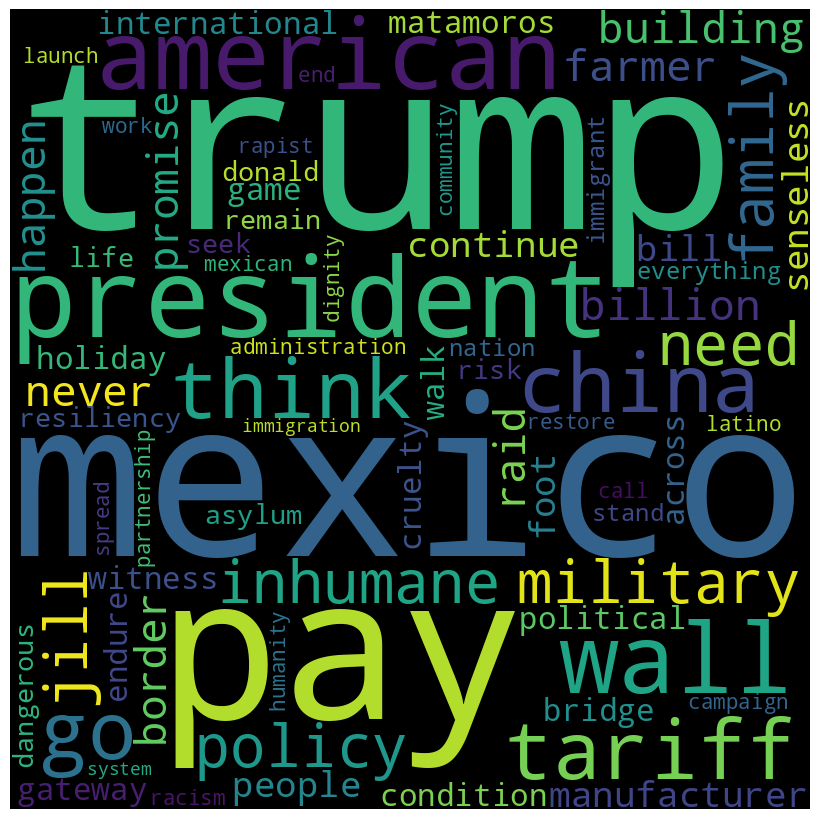

In [ ]:
make_word_cloud(df_bd_neg['text_clean'])

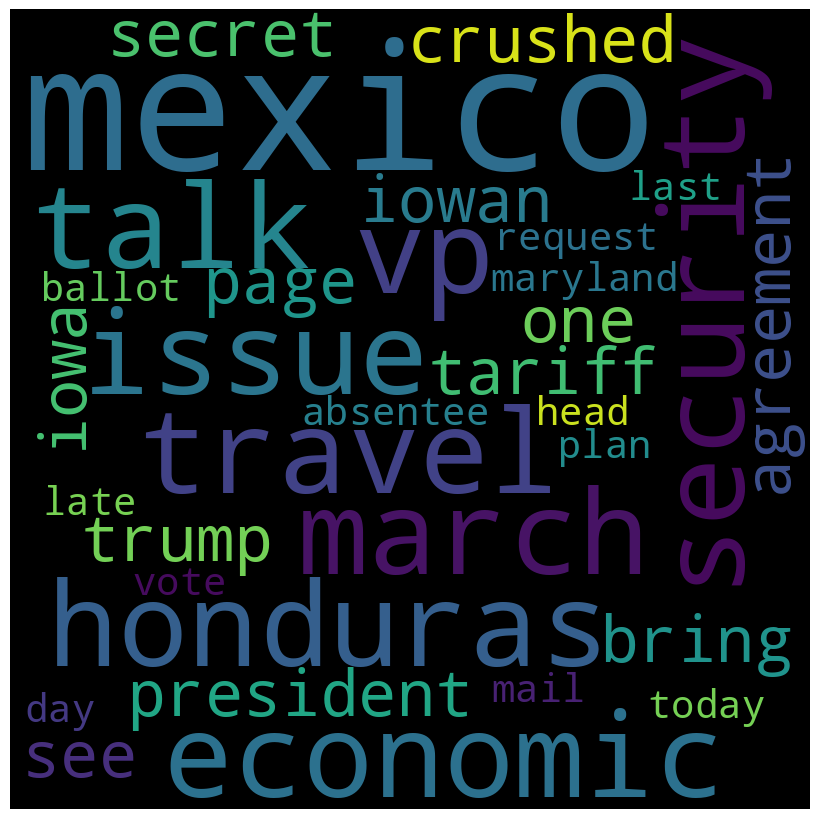

In [ ]:
make_word_cloud(df_bd_neu['text_clean'])

## Embeddings + Clustering por polaridad